In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import os

from sympy.abc import alpha

In [2]:
file_list = os .listdir("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/openr1")
file_list = [f for f in file_list if "sft1_eval_" in f]

In [3]:
def extract_index(file_path, index = None):
    if index is None:
        raise ValueError("Index must be provided")
    with open(file_path, "r", encoding='utf-8') as f:
        text = f.read()
    return text.split(index)[1].split("\n")[0].strip()

iter_list = []
p1_list = []
p5_list = []
sc_list = []
sa_list = []
pa_list = []
ff_list = []

for i in range(100,3600,100):
    file = "sft1_eval_"+str(i)+".log"
    if file in file_list:
        iter_list.append(i)
        p1_list.append(extract_index(os.path.join("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/openr1", file), "pass@1:"))
        p5_list.append(extract_index(os.path.join("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/openr1", file), "pass@5:"))
        sc_list.append(extract_index(os.path.join("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/openr1", file), "self_consistency:"))
        sa_list.append(extract_index(os.path.join("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/openr1", file), "step_accuracy:"))
        pa_list.append(extract_index(os.path.join("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/openr1", file), "path_accuracy:"))
        ff_list.append(extract_index(os.path.join("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/openr1", file), "faithfulness:"))
p1_list = [float(i) for i in p1_list]
p5_list = [float(i) for i in p5_list]
sc_list = [float(i) for i in sc_list]
sa_list = [float(i) for i in sa_list]
pa_list = [float(i) for i in pa_list]
ff_list = [float(i) for i in ff_list]

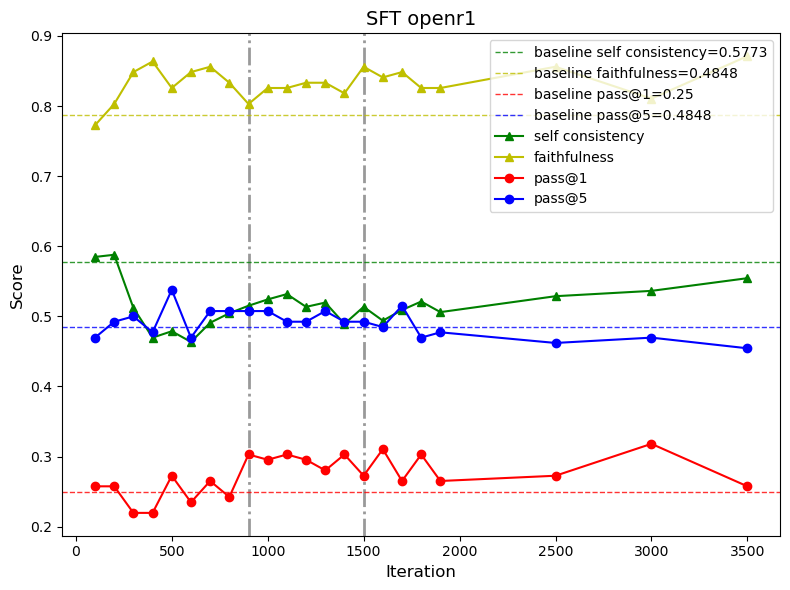

In [4]:
plt.figure(figsize=(8, 6))
plt.axvline(x=900, color='gray', linestyle='-.', linewidth=2, alpha = 0.8)
plt.axvline(x=1500, color='gray', linestyle='-.', linewidth=2, alpha = 0.8)
plt.axhline(y=0.5773, color='g', linestyle='--', linewidth=1, alpha = 0.8, label='baseline self consistency=0.5773')
plt.axhline(y=0.7879, color='y', linestyle='--', linewidth=1, alpha = 0.8, label='baseline faithfulness=0.4848')
plt.axhline(y=0.25, color='r', linestyle='--', linewidth=1, alpha = 0.8, label='baseline pass@1=0.25')
plt.axhline(y=0.4848, color='b', linestyle='--', linewidth=1, alpha = 0.8, label='baseline pass@5=0.4848')
plt.plot(iter_list, sc_list, label="self consistency", marker='^', c='g')
# plt.plot(iter_list, sa_list, label="step accuracy", marker='o', c='m')
# plt.plot(iter_list, pa_list, label="path accuracy", marker='o', c='c')
plt.plot(iter_list, ff_list, label="faithfulness", marker='^', c='y')
plt.plot(iter_list, p1_list, label="pass@1", marker='o', c='r')
plt.plot(iter_list, p5_list, label="pass@5", marker='o', c='b')

# 设置标题和坐标轴标签
plt.title("SFT openr1", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Score", fontsize=12)

# 设置图例
plt.legend(loc='best', fontsize=10)

# 设置坐标轴刻度字体
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 自适应边距
plt.tight_layout()

# 显示图形
plt.savefig(os.path.join("SFT_openr1.png"), dpi=300, bbox_inches='tight')
plt.show()

In [9]:
def extract_index(file_path, index = None):
    if index is None:
        raise ValueError("Index must be provided")
    with open(file_path, "r", encoding='utf-8') as f:
        text = f.read()
    return text.split(index)[1].split("\n")[0].strip()
def extract_iter(file_name):
    return int(file_name.split('epoch_')[1].split('_i')[0])*1000 + int(file_name.split('i_')[1].split('_')[0])
data_names = ["openr1","deepscaler","aime"]
data_name = data_names[0]
file_list = os .listdir("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/"+data_name)
file_list = [f for f in file_list if "epoch_" in f]
iter_list = []
p1_list = []
p5_list = []
sc_list = []
sa_list = []
pa_list = []
ff_list = []
iter_list = [6,534,546,560,570,650,666,824,1076]
file_list.sort(key=extract_iter)
for i, file in enumerate(file_list):
    p1_list.append(extract_index(os.path.join("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/"+data_name, file), "pass@1:"))
    p5_list.append(extract_index(os.path.join("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/"+data_name, file), "pass@5:"))
    sc_list.append(extract_index(os.path.join("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/"+data_name, file), "self_consistency:"))
    sa_list.append(extract_index(os.path.join("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/"+data_name, file), "step_accuracy:"))
    pa_list.append(extract_index(os.path.join("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/"+data_name, file), "path_accuracy:"))
    ff_list.append(extract_index(os.path.join("D:/PycharmFiles/wanghongyu2/other/Qwen/SFT/output2/"+data_name, file), "faithfulness:"))
p1_list = [float(i) for i in p1_list]
p5_list = [float(i) for i in p5_list]
sc_list = [float(i) for i in sc_list]
sa_list = [float(i) for i in sa_list]
pa_list = [float(i) for i in pa_list]
ff_list = [float(i) for i in ff_list]

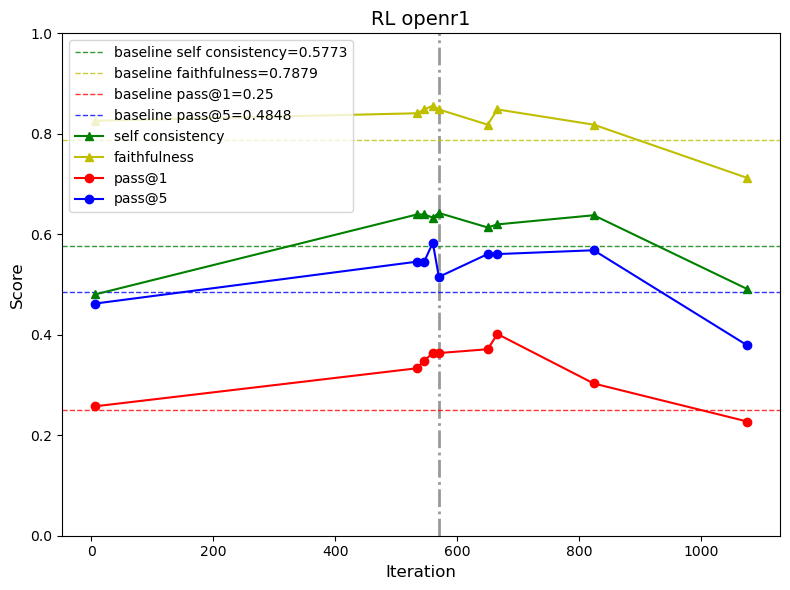

In [10]:
# baselines=[0.25,0.4848,0.5773,0.7879]
# baselines = [0.3030,0.5076,0.5152,0.8030] #SFT
# baselines = [0.1400,0.4600,0.3680,0.9600]
# baselines = [0.1333,0.133,0.3133,0.9667]
# 650m, 570
vertical_line = 570
if data_name == "openr1":
    baselines=[0.25,0.4848,0.5773,0.7879]
elif data_name == "deepscaler":
    baselines=[0.2200,0.4600,0.6240,0.9500]
elif data_name == "aime":
    baselines=[0.0667,0.2333,0.3467,0.9667]
else:
    raise ValueError("Invalid data_name")
# if data_name == "openr1":
#     baselines=[0.3030,0.5076,0.5152,0.8030]
# elif data_name == "deepscaler":
#     baselines=[0.1400,0.4600,0.3680,0.9600]
# elif data_name == "aime":
#     baselines=[0.1333,0.133,0.3133,0.9667]
# else:
#     raise ValueError("Invalid data_name")
plt.figure(figsize=(8, 6))
plt.axvline(x=vertical_line, color='gray', linestyle='-.', linewidth=2, alpha = 0.8)
plt.axhline(y=baselines[2], color='g', linestyle='--', linewidth=1, alpha = 0.8, label=f'baseline self consistency={baselines[2]}')
plt.axhline(y=baselines[3], color='y', linestyle='--', linewidth=1, alpha = 0.8, label=f'baseline faithfulness={baselines[3]}')
plt.axhline(y=baselines[0], color='r', linestyle='--', linewidth=1, alpha = 0.8, label=f'baseline pass@1={baselines[0]}')
plt.axhline(y=baselines[1], color='b', linestyle='--', linewidth=1, alpha = 0.8, label=f'baseline pass@5={baselines[1]}')
plt.plot(iter_list, sc_list, label="self consistency", marker='^', c='g')
# plt.plot(iter_list, sa_list, label="step accuracy", marker='o', c='m')
# plt.plot(iter_list, pa_list, label="path accuracy", marker='o', c='c')
plt.plot(iter_list, ff_list, label="faithfulness", marker='^', c='y')
plt.plot(iter_list, p1_list, label="pass@1", marker='o', c='r')
plt.plot(iter_list, p5_list, label="pass@5", marker='o', c='b')

# 设置标题和坐标轴标签
plt.title(f"RL {data_name}", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim([0,1])
# 设置图例
plt.legend(loc='best', fontsize=10)

# 设置坐标轴刻度字体
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 自适应边距
plt.tight_layout()

# 显示图形
plt.savefig(os.path.join(f"RL_{data_name}.png"), dpi=300, bbox_inches='tight')
plt.show()